In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [18]:
train_epochs = 15
batch_size = 100

mnist_train = dsets.MNIST(root = 'MNIST_data/', train = True, transform = transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False, transform = transforms.ToTensor(), download = True)

In [19]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [20]:
mnist_test

Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()

In [21]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                         batch_size = batch_size,
                                         shuffle = True,
                                         drop_last = True)

In [22]:
linear = torch.nn.Linear(784, 10, bias = True).to(device)

In [23]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [24]:
len(data_loader) # 10000/100 = 100

600

In [25]:
data_loader.__len__()

600

In [26]:
for epoch in range(train_epochs):
    avg_cost = 0
    total_batch = len(data_loader) # 100
    
    for X, Y in data_loader:
        X = X.view(-1 ,28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.534325898
Epoch: 0002 cost = 0.359339893
Epoch: 0003 cost = 0.330961853
Epoch: 0004 cost = 0.316356391
Epoch: 0005 cost = 0.307018667
Epoch: 0006 cost = 0.300158113
Epoch: 0007 cost = 0.294845372
Epoch: 0008 cost = 0.290630013
Epoch: 0009 cost = 0.287186623
Epoch: 0010 cost = 0.284140408
Epoch: 0011 cost = 0.281956971
Epoch: 0012 cost = 0.279748738
Epoch: 0013 cost = 0.277625740
Epoch: 0014 cost = 0.275916874
Epoch: 0015 cost = 0.274228185
Learning finished


In [28]:
X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
Y_test = mnist_test.test_labels.to(device)

C:\Users\dxodn\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\dxodn\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [31]:
X_test.shape, Y_test.shape

(torch.Size([10000, 784]), torch.Size([10000]))

In [32]:
prediction = linear(X_test)
correct_prediction = torch.argmax(prediction, 1) == Y_test; correct_prediction

tensor([ True,  True,  True,  ...,  True, False,  True])

In [33]:
accuracy = correct_prediction.float().mean()
print('Accuracy:', accuracy.item())

# Get one and predict
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

Accuracy: 0.8906000256538391


C:\Users\dxodn\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\dxodn\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [34]:
Y_single_data

tensor([8])

In [39]:
Z_single_data = mnist_test.test_labels[r:r + 1]; Z_single_data

C:\Users\dxodn\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([8])

Label:  8
Prediction:  3


C:\Users\dxodn\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


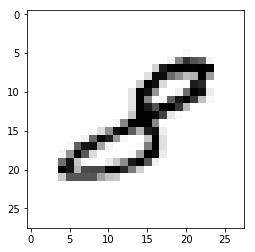

In [40]:
print('Label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()